<a target="_blank" href="https://colab.research.google.com/github/trainocate-japan/Machine-Learning-and-Deep-Learning-Hands-on/blob/main/answer/6_ディープラーニング/6-3_（演習）TensorFlow_Kerasによるワインの品種分類.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 6-3_TensorFlow/Kerasによるワインの品種分類
このノートブックでは、TensorFlow / Kerasで分類の予測モデルを作成します。<br>
予測を行うテーマはwineの成分からブドウの品種を予測することです。

## ライブラリのインポート

In [ ]:
# データを処理するための基本的なライブラリ
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# scikit-learnから必要なライブラリをインポート
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# TensorFlow/Kerasで使用
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping # 早期終了

## データの準備
今回使用するデータはscikit-learnからもデータセットとして利用することができる、UCI ML Wine Data Setのコピーです。<br>
UCI Machine Learning Repositoryから公開されています。<br>
downloaded from : https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

データセットについての説明はこちらに記載されています。<br>
https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset

#### データを取り込む
- pandasのread_csvメソッドを使用して、wine.csvファイルを読み込みます
- 読み込んだものは変数df_wineに代入します

In [ ]:
# csvファイルを読み込みます
df_wine = pd.read_csv("wine.csv")

#### データを確認する
*   Class以外：ワインの成分を表す値
*   Class：ブドウの品種を0,1,2であらわしている



In [ ]:
# 読み込んだデータを確認します
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23000,1.71000,2.43000,15.60000,127.00000,2.80000,3.06000,0.28000,2.29000,5.64000,1.04000,3.92000,"1,065.00000",0
1,13.20000,1.78000,2.14000,11.20000,100.00000,2.65000,2.76000,0.26000,1.28000,4.38000,1.05000,3.40000,"1,050.00000",0
2,13.16000,2.36000,2.67000,18.60000,101.00000,2.80000,3.24000,0.30000,2.81000,5.68000,1.03000,3.17000,"1,185.00000",0
3,14.37000,1.95000,2.50000,16.80000,113.00000,3.85000,3.49000,0.24000,2.18000,7.80000,0.86000,3.45000,"1,480.00000",0
4,13.24000,2.59000,2.87000,21.00000,118.00000,2.80000,2.69000,0.39000,1.82000,4.32000,1.04000,2.93000,735.00000,0


In [ ]:
# df_wineのデータ要約を確認
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Class

In [ ]:
# df_wineの統計情報を確認
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
count,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000
mean,13.00062,2.33635,2.36652,19.49494,99.74157,2.29511,2.02927,0.36185,1.59090,5.05809,0.95745,2.61169,746.89326,0.93820
std,0.81183,1.11715,0.27434,3.33956,14.28248,0.62585,0.99886,0.12445,0.57236,2.31829,0.22857,0.70999,314.90747,0.77503
min,11.03000,0.74000,1.36000,10.60000,70.00000,0.98000,0.34000,0.13000,0.41000,1.28000,0.48000,1.27000,278.00000,0.00000
25%,12.36250,1.60250,2.21000,17.20000,88.00000,1.74250,1.20500,0.27000,1.25000,3.22000,0.78250,1.93750,500.50000,0.00000
50%,13.05000,1.86500,2.36000,19.50000,98.00000,2.35500,2.13500,0.34000,1.55500,4.69000,0.96500,2.78000,673.50000,1.00000
75%,13.67750,3.08250,2.55750,21.50000,107.00000,2.80000,2.87500,0.43750,1.95000,6.20000,1.12000,3.17000,985.00000,2.00000
max,14.83000,5.80000,3.23000,30.00000,162.00000,3.88000,5.08000,0.66000,3.58000,13.00000,1.71000,4.00000,"1,680.00000",2.00000


#### 説明変数と目的変数を切り出す

In [ ]:
# 目的変数にするClass以外をすべて説明変数にする
x = df_wine.drop(columns='Class')
x.tail(4)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
174,13.40000,3.91000,2.48000,23.00000,102.00000,1.80000,0.75000,0.43000,1.41000,7.30000,0.70000,1.56000,750.00000
175,13.27000,4.28000,2.26000,20.00000,120.00000,1.59000,0.69000,0.43000,1.35000,10.20000,0.59000,1.56000,835.00000
176,13.17000,2.59000,2.37000,20.00000,120.00000,1.65000,0.68000,0.53000,1.46000,9.30000,0.60000,1.62000,840.00000
177,14.13000,4.10000,2.74000,24.50000,96.00000,2.05000,0.76000,0.56000,1.35000,9.20000,0.61000,1.60000,560.00000


In [ ]:
# 目的変数はClass
# copy()を使用して、df_wineからClassの列のコピーを取得
# (後でDataFrameの列を増やすため、参照渡しを防ぐ目的）
y = df_wine[['Class']].copy()
y.tail(4)

,Class
174,2
175,2
176,2
177,2


#### 目的変数をone-hot表現に変換する

In [ ]:
# Kerasの多値分類では目的変数をone-hot表現に直します
# pop('列名')でその列の値だけを取り出します(もとのDataFrameからは列が消去されます)
Class = y.pop('Class')

In [ ]:
# 0,1,2それぞれをclass_0, class_1, class_2のone-hot表現に変換します
# booleanで値が帰ってきているため1を掛けてintにしています
y['class_0'] = (Class == 0)*1
y['class_1'] = (Class == 1)*1
y['class_2'] = (Class == 2)*1
y.tail(4)

,class_0,class_1,class_2
174,0,0,1
175,0,0,1
176,0,0,1
177,0,0,1


#### データを訓練データと検証データに分割する

In [ ]:
# 訓練データと検証データに分割（80%を訓練用に使用）
train_x, val_x, train_y, val_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0) 

### データのスケールを揃える

説明変数を標準化

In [ ]:
# 訓練データ説明変数の各列の平均を計算する
train_x_mean = train_x.mean()
train_x_mean.head()

alcohol              12.98486
malic_acid            2.37261
ash                   2.36690
alcalinity_of_ash    19.55493
magnesium           100.06338
dtype: float64

In [ ]:
# 訓練データ説明変数の各列の標準偏差を計算する
train_x_std = train_x.std()
train_x_std.head()

alcohol              0.80718
malic_acid           1.11536
ash                  0.26968
alcalinity_of_ash    3.44255
magnesium           14.24916
dtype: float64

In [ ]:
# 訓練データ説明変数の標準化を行う
train_x_scaled = (train_x - train_x_mean) / train_x_std
train_x_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
161,0.87359,0.79561,0.64186,0.12929,0.48681,-0.70078,-1.42343,1.06867,-1.36338,0.35069,0.02891,-1.06037,-0.20518
92,-0.36530,-0.75546,-0.39640,0.33262,-1.40804,-1.43645,-0.50122,1.69510,0.02358,-0.83818,0.02891,-0.72825,-0.81416
94,-1.69091,-0.34303,-0.32223,-0.45168,-0.14481,1.24464,0.31851,-1.51533,-0.43310,-0.75416,0.89879,0.51717,-1.30794
174,0.51431,1.37838,0.41937,1.00073,0.13591,-0.74983,-1.22874,0.52055,-0.33161,0.94723,-1.10193,-1.42016,0.02524
24,0.63820,-0.50442,0.90142,0.12929,-0.28517,0.44359,0.67715,-0.65400,0.09124,-0.64073,0.72482,1.70725,0.33797


In [ ]:
# 検証データ説明変数の標準化を行う
val_x_scaled = (val_x - train_x_mean) / train_x_std
val_x_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
54,0.93554,-0.62994,-0.43348,-0.91645,1.25878,0.55802,0.97431,-1.20212,0.02358,0.33809,-0.14506,0.84929,1.04570
151,-0.24141,0.26664,0.41937,0.71025,0.83771,-1.27297,-0.60369,-0.96721,-0.58533,2.41756,-2.05879,-1.54470,-0.86354
63,-0.76174,-1.11408,-0.76720,-0.16120,-0.91678,2.02935,1.17924,-1.35873,0.44644,-0.25005,1.15976,0.39263,-1.06105
55,0.71254,-0.57614,0.34521,0.27453,1.11843,1.14656,0.85134,-1.28042,1.42746,0.50613,0.11590,0.61404,1.24321
123,0.08070,3.07290,-0.87844,0.56501,-0.98696,0.59072,0.71814,-0.49739,0.68324,-1.02722,-0.97145,0.71091,-1.19272


## モデルの定義

In [ ]:
tf.random.set_seed(0)

# モデルオブジェクトを用意し必要な層を追加していく
model = Sequential()

# 中間層1層目
model.add(Dense(64, input_shape=(train_x_scaled.shape[1],)))
model.add(Activation('relu'))
# 中間層2層目
model.add(Dense(64))
model.add(Activation('relu'))
# 出力層
model.add(Dense(3)) # 多値分類の場合は活性化関数にsoftmaxを指定
model.add(Activation('softmax'))
# 最適化手法としてAdam、誤差関数として交差エントロピー誤差を設定
# 分類の場合、metricsに正解率を指定することで、エポックごとに正解率も計算させることができる
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainabl

## モデルの学習

In [ ]:
history = model.fit(train_x_scaled, train_y, epochs=700, batch_size=32, validation_data = (val_x_scaled, val_y), verbose=1)

Epoch 1/700
5/5 [==============================] - 2s 157ms/step - loss: 1.0666 - acc: 0.2887 - val_loss: 0.9055 - val_acc: 0.6389
Epoch 2/700
5/5 [==============================] - 0s 16ms/step - loss: 0.8723 - acc: 0.7465 - val_loss: 0.7551 - val_acc: 0.9444
Epoch 3/700
5/5 [==============================] - 0s 13ms/step - loss: 0.7197 - acc: 0.8732 - val_loss: 0.6336 - val_acc: 0.9444
Epoch 4/700
5/5 [==============================] - 0s 25ms/step - loss: 0.5897 - acc: 0.9296 - val_loss: 0.5272 - val_acc: 0.9444
Epoch 5/700
5/5 [==============================] - 0s 20ms/step - loss: 0.4837 - acc: 0.9648 - val_loss: 0.4351 - val_acc: 0.9722
Epoch 6/700
5/5 [==============================] - 0s 17ms/step - loss: 0.3957 - acc: 0.9577 - val_loss: 0.3550 - val_acc: 0.9722
Epoch 7/700
5/5 [==============================] - 0s 25ms/step - loss: 0.3262 - acc: 0.9718 - val_loss: 0.2905 - val_acc: 0.9722
Epoch 8/700
5/5 [==============================] - 0s 22ms/step - loss: 0.2675 - acc: 0.9

## 評価

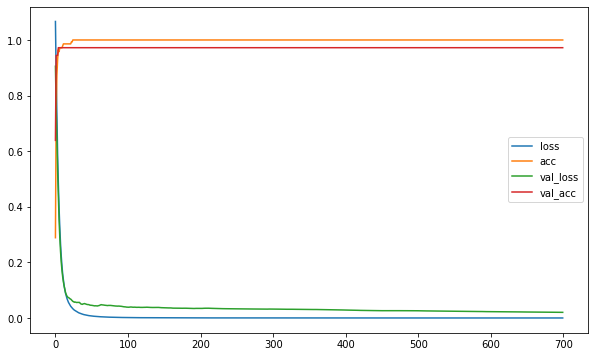

In [ ]:
# 学習過程で損失、正解率ともに確認しているので、可視化のみ行う
df_history = pd.DataFrame(history.history)
df_history.plot(figsize=(10, 6))

## ニューラルネットワークモデルを改良する

In [ ]:
tf.random.set_seed(0)

model = Sequential()
# 中間層1
model.add(Dense(64, input_shape=(train_x.shape[1],)))
model.add(Activation('relu')) 
model.add(Dropout(0.3)) # ドロップアウトの追加
# 中間層2
model.add(Dense(64))
model.add(Activation('relu')) 
model.add(Dropout(0.3)) # ドロップアウトの追加
# 出力層
model.add(Dense(3))
model.add(Activation('softmax'))
# 最適化手法としてAdam、誤差関数として交差エントロピー誤差を設定
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                

In [ ]:
es = EarlyStopping(monitor='val_loss',
                       patience=10,
                       verbose=1)

In [ ]:
history = model.fit(train_x_scaled, train_y, epochs=700, validation_data = (val_x_scaled, val_y), verbose=1, callbacks=[es]) # EarlyStoppingを設定

Epoch 1/700
5/5 [==============================] - 1s 55ms/step - loss: 1.1112 - acc: 0.2746 - val_loss: 0.9264 - val_acc: 0.6389
Epoch 2/700
5/5 [==============================] - 0s 8ms/step - loss: 0.9368 - acc: 0.5704 - val_loss: 0.7935 - val_acc: 0.8889
Epoch 3/700
5/5 [==============================] - 0s 8ms/step - loss: 0.8287 - acc: 0.6197 - val_loss: 0.6861 - val_acc: 0.9167
Epoch 4/700
5/5 [==============================] - 0s 8ms/step - loss: 0.7172 - acc: 0.7394 - val_loss: 0.5910 - val_acc: 0.9722
Epoch 5/700
5/5 [==============================] - 0s 8ms/step - loss: 0.6447 - acc: 0.7746 - val_loss: 0.5074 - val_acc: 0.9722
Epoch 6/700
5/5 [==============================] - 0s 8ms/step - loss: 0.5113 - acc: 0.8803 - val_loss: 0.4340 - val_acc: 0.9722
Epoch 7/700
5/5 [==============================] - 0s 8ms/step - loss: 0.5095 - acc: 0.8662 - val_loss: 0.3720 - val_acc: 0.9722
Epoch 8/700
5/5 [==============================] - 0s 8ms/step - loss: 0.4296 - acc: 0.9155 - va

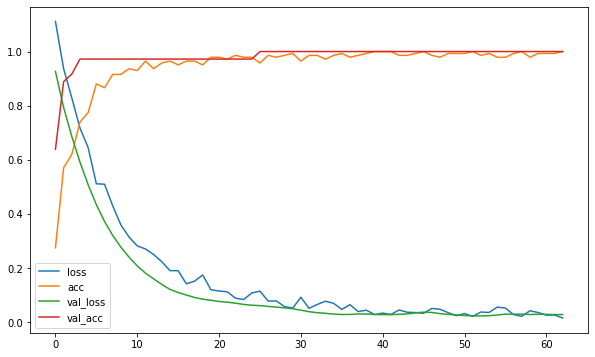

In [ ]:
df_history = pd.DataFrame(history.history)
df_history.plot(figsize=(10, 6))

※ ニューラルネットワークの構成によっては、結果が97.2%もしくは100%になるかもしれません。これはテストデータを切り出す際に全体の20%で指定をすると36件のデータがテストデータとなり、そのうちの35件を正しく予測できると97.2%になるため、35件あてられたか、36件あてられたかの違いです。

このノートブックは以上です。